### 1. Importing the Necessary Libraries

In [54]:
# Basics libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [55]:
# Algorithm used to build the model

from sklearn.model_selection import train_test_split   # to perfom train test split
from sklearn.linear_model import LinearRegression      
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [56]:
# Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

# For scaling my data  -- 
from sklearn.preprocessing import StandardScaler

### 2. Loading the Dataset

In [57]:
train_data = pd.read_excel(r"C:\Users\pushp\Downloads\Data_Train (1).xlsx")

In [58]:
# checking top 5 records
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [59]:
train_data.shape

(10683, 11)

1. Training data                 ----- In this dataset both independent and dependent features will be available(X,y)
2. Testing data                  ----- In this dataset only independent features will be available but dependent features wont be given 
3. Sample submission Dataset      ---- which format the file should be submitted 

In [60]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


We can see there is a missing values in Route and Total Stops (so we can treat the missing values later on)

### Now will load Test dataset

In [61]:
test_data = pd.read_excel(r"C:\Users\pushp\Downloads\Test_set (1).xlsx")

In [62]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [63]:
test_data.shape

(2671, 10)

In [64]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


### 3. EDA [Exploratory Data Analysis]

#### 1. Training Dataset

### 1. Checking for Null values

In [65]:
null_features = train_data.isnull().sum()
null_features[null_features>0]

Route          1
Total_Stops    1
dtype: int64

In [66]:
train_data[(train_data['Route'].isnull()) | (train_data['Total_Stops'].isnull())]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In the 9039th row the is a null values for both Routes and as well as Total_Stops (1. Drop those records, or you can treat the missing values)

### 2. Checking for Duplicates

In [67]:
train_data[train_data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [68]:
# Removing the duplicates values by keeping first records

train_data.drop_duplicates(keep = 'first',inplace=True)

In [69]:
train_data.shape

(10463, 11)

### 3. Feature Engineering

#### 1. Date_of_Journey

In [70]:
# Will check for data_of_Journey

train_data.Date_of_Journey.dtype

dtype('O')

In [71]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [72]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [73]:
# will check 1 records to know how the data looks like
train_data.Date_of_Journey[0]

'24/03/2019'

#### Now we can Extract only date from the Date_of_Journey

In [74]:
train_data['Date'] = pd.to_datetime(train_data.Date_of_Journey,format = "%d/%m/%Y").dt.day

In [75]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


#### Now we can Extract only Month from the Date of Journey

In [76]:
train_data['Month'] = pd.to_datetime(train_data.Date_of_Journey,format = "%d/%m/%Y").dt.month

#### Now we can Extract only Year from the Date of Journey

In [77]:
train_data['Year'] = pd.to_datetime(train_data.Date_of_Journey,format = "%d/%m/%Y").dt.year

In [78]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [79]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [80]:
train_data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


### 2. Departure Time

#### Similar to Date_of_Journey we can extract values for hours and as well as minutes for Departure Time

In [81]:
train_data['Dep_Time'].dtype

dtype('O')

In [82]:
train_data.Dep_Time[0]

'22:20'

### Now will extract hours from the dep_time

In [83]:
train_data['Dep_hour'] = pd.to_datetime(train_data.Dep_Time).dt.hour

### Now will extract Minutes from the dep_time

In [84]:
train_data['Dep_minutes'] = pd.to_datetime(train_data.Dep_Time).dt.minute

In [85]:
train_data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50


In [86]:
train_data.drop(['Dep_Time'],axis = 1,inplace=True)

In [87]:
train_data.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50


In [88]:
train_data.Arrival_Time[:10]

0    01:10 22 Mar
1           13:15
2    04:25 10 Jun
3           23:30
4           21:35
5           11:25
6    10:25 13 Mar
7    05:05 02 Mar
8    10:25 13 Mar
9           19:15
Name: Arrival_Time, dtype: object

### 3. Arrival Time

#### Similar to dep_time we can extract the hr mins in arival time

In [89]:
# Extracting hours from the arival time
train_data['Arrival_hour'] = pd.to_datetime(train_data.Arrival_Time).dt.hour

In [90]:
# Extracting minutes from the arival time
train_data['Arrival_minutes'] = pd.to_datetime(train_data.Arrival_Time).dt.minute

In [91]:
# Dropping Arrival_Time 
train_data.drop(['Arrival_Time'],axis = 1,inplace=True)

In [92]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


#### 4. Duration

In [93]:
train_data['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10463, dtype: object

In [94]:
a = train_data['Duration'][0]

In [95]:
int(a.split('m')[0].split()[-1])

50

In [96]:
duration = list(train_data['Duration'])


for i in range(len(duration)):
    if len(duration[i].split())  !=2:    # To check if the duration is having only hours or mins
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'       # if the mins is not present i am adding 0m
        else:
            duration[i] = '0h ' + duration[i]               # if the hr is not present i will add 0h
            
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split('h')[0]))
    duration_mins.append(int(duration[i].split('m')[0].split()[-1]))


In [97]:
# Adding duration hours and duration mins in dataframe

train_data['Duration_hours'] = duration_hours
train_data['Duration_mins'] = duration_mins

In [98]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [99]:
# Now let me remove duration column

train_data.drop('Duration',axis=1,inplace=True)

In [100]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


### Route

In [101]:
# Most Busiest Routes

train_data.Route.value_counts()

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

### Delhi to Cochin via Mumbai as Busiest Routes wiht 2376 which is fallowed by Banglore to Delhi.

### So Let me Drop Routes information because it will leads to multicolinearity (where 2 independent features are related to eachother or giving same information(Routes&Total stops))

In [102]:
train_data.drop('Route',axis=1,inplace=True)

In [103]:
train_data.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0


### Now will do some analysis for those categorical features

In [104]:
df_categorical_features = train_data.select_dtypes(include='object')

### Now will perform countplot for all the categorical features

In [105]:
for i in df_categorical_features.columns:
    print(i)
    sns.countplot(train_data[i])
    plt.xticks(rotation = 90)
    plt.show()

Airline


ValueError: could not convert string to float: 'IndiGo'

1. Airline

- Jet Airways is the most preferred airline with higest records

2. Source 
- Majority of the flights take off from Delhi

3. Destination
- Maximum flights landed in cochin

4. Total Stops
- Majority of the flights have 1 stops

5. Additional Info
- Additional Info column most of the records was given like No info 

### Now will compare the categorical features with Price column and will understand how it is impacting the price column

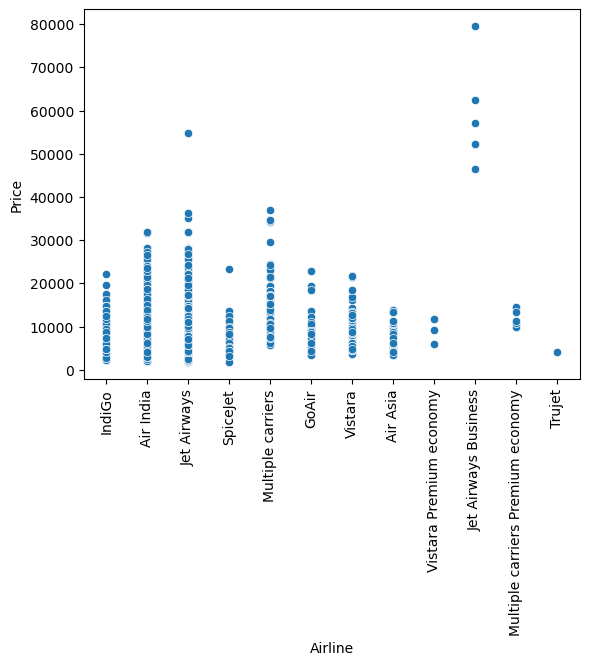

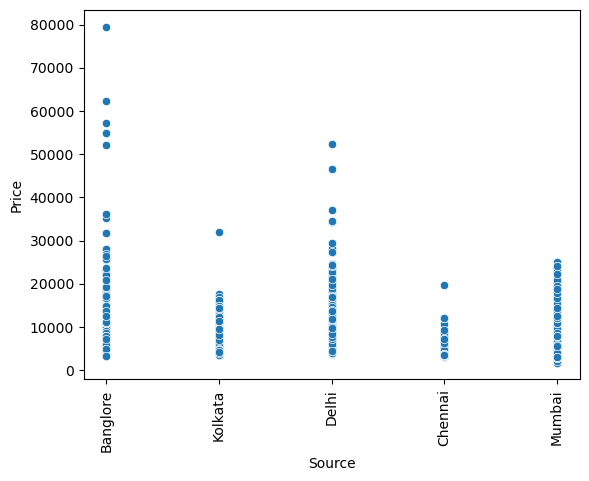

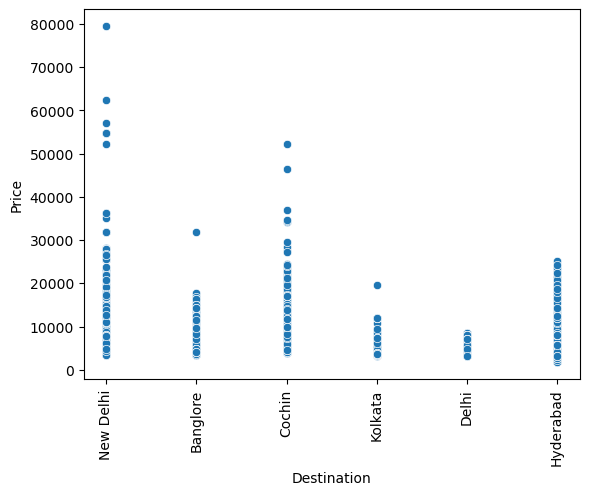

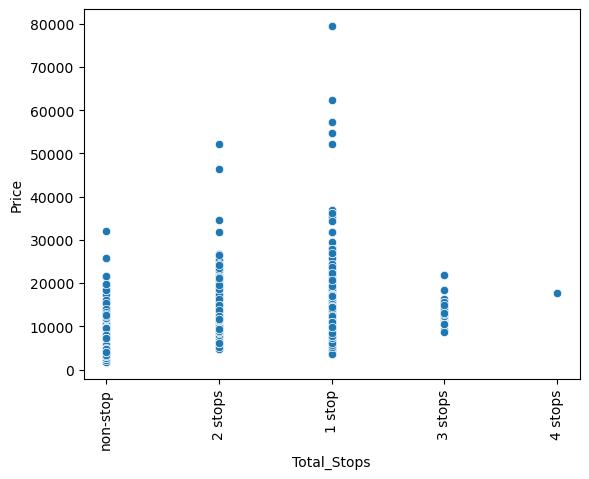

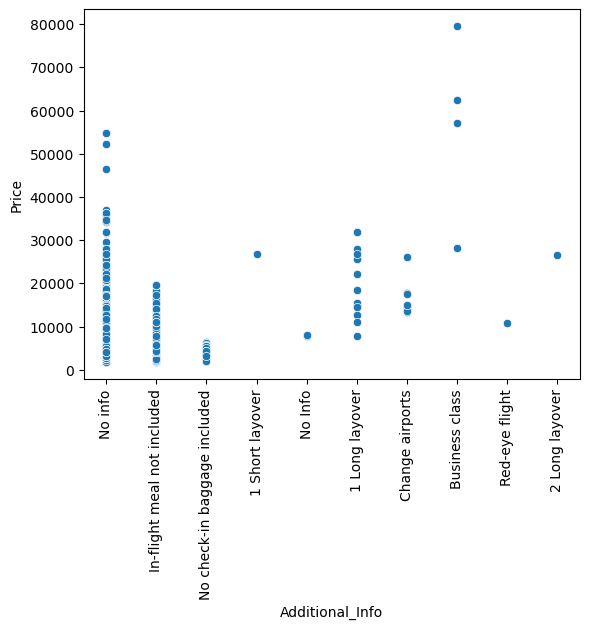

In [106]:
for i in df_categorical_features:
    sns.scatterplot(x = train_data[i],y=train_data['Price'])
    plt.xticks(rotation = 90)
    plt.show()

1. Jet Airways Business has the higest price it is ranging between 40k to 80k
2. All the highcost flights departure is taking from bangalore  
3. All the highcost flights landing in New_Delhi
4. The flights having 1 stop are charging high
5. If a flights is of business class its price is high

In [107]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [108]:
train_data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [109]:
train_data.shape

(10463, 15)

In [110]:
train_data = train_data.dropna()

In [111]:
train_data.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Dep_hour           0
Dep_minutes        0
Arrival_hour       0
Arrival_minutes    0
Duration_hours     0
Duration_mins      0
dtype: int64

In [112]:
train_data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [113]:
Label Encoding (Ordinal Encoding)     ---  
OHE (Nominal Encoding)                ---

SyntaxError: invalid syntax (4189599731.py, line 1)

In [114]:
# Now will perform encoding to convert categorical data in to numbers

train_data.replace({'non-stop':0,'2 stops': 2,'1 stop':1,'3 stops':3,'4 stops':4},inplace=True)

In [115]:
train_data.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,5,50,13,15,7,25


In [116]:
train_data.Additional_Info.value_counts(normalize=True)*100

No info                         78.206844
In-flight meal not included     18.409482
No check-in baggage included     3.039572
1 Long layover                   0.181610
Change airports                  0.066909
Business class                   0.038234
No Info                          0.028675
1 Short layover                  0.009558
Red-eye flight                   0.009558
2 Long layover                   0.009558
Name: Additional_Info, dtype: float64

So we can see that in Additional Info column 78% of data is telling No information so no use of keeping those feature for prediction

In [117]:
train_data.drop('Additional_Info',axis=1,inplace=True)

### Now i will be backuping the data

In [118]:
train_data_backup = train_data.copy(deep=True)

In [119]:
# All the columns are nominal data so we are going to perfrom dummies 

train_data = pd.get_dummies(train_data,drop_first = True)

In [120]:
train_data.shape

(10462, 31)

### 4. Sep Dependent and Independent Variable

In [121]:
X = train_data.drop('Price',axis=1)
y = train_data['Price']

In [122]:
print(f'Independent Features shape = {X.shape}, Dependent Features Shape = {y.shape}')

Independent Features shape = (10462, 30), Dependent Features Shape = (10462,)


### 5. Performing Train Test Split

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 14)

### Linear Regression

In [124]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [125]:
mse_train = mean_squared_error(y_train,y_train_pred)

In [126]:
mse_test = mean_squared_error(y_test,y_test_pred)

In [127]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [128]:
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)

rmse_train =  2893.706979163004
rmse_test =  2620.988026376159


#### If the Price of the flights is 10000rs then by using my model i can say that the price of the flights will range between 7380 to 12620rs with 95% confident interval

In [129]:
r2_score(y_train,y_train_pred)

0.6185110349883294

In [130]:
r2_score(y_test,y_test_pred)

0.6410430557741906

In [131]:
DM = DecisionTreeRegressor()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  796.8163752037271
rmse_test =  2472.1524803717093
train_score =  0.9710739336696111
test_score =  0.6806530343936326


In [132]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  1014.1793358564727
rmse_test =  1831.2279255922572
train_score =  0.9531399884348306
test_score =  0.8247745876485355


### First we want to build the base model and which ever model was giving me best accuracy based on that we want to perfrom Hypertuning technique

In [133]:
# Number of trees in random Forest
n_estimators = [i for i in range(100,600,100)]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# The depth of the tree max_depth
max_depth = [i for i in range(5,30,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,100]
# Min no of samples required to each leaf to split                        ---- Pruning
min_samples_leaf = [1,2,5,10]

In [134]:
# creating the random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [135]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=4,random_state = 0)

In [ ]:
rf_model.fit(X_train,y_train)

In [ ]:
# best Parameter
rf_model.best_params_

In [ ]:
RF = RandomForestRegressor(n_estimators = 100,min_samples_split = 10,min_samples_leaf =2,max_features ='auto',max_depth = 29)
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_model = GridSearchCV(estimator = RF,param_grid = random_grid,cv=4)

In [ ]:
rf_model.fit(X_train,y_train)

In [ ]:
rf_model.best_params_

### Feature Selection Technique

In [ ]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

In [ ]:
print(selection.feature_importances_)

In [ ]:
# let me plot feature importances 

feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)

In [ ]:
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [ ]:
X_imp = X[feat_importances.nlargest(15).index]

In [ ]:
X_imp

#### Now i will build the model by keeping top featues that are helping to target variable

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [ ]:
rf_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=4,random_state = 0)
rf_model.fit(X_train,y_train)

In [ ]:
# best Parameter
rf_model.best_params_

In [ ]:
RF = RandomForestRegressor(n_estimators = 100,min_samples_split = 10,min_samples_leaf =2,max_features ='auto',max_depth = 29)
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

In [ ]:
# Now we are going to perform for Test Data

In [ ]:
test_data.head()

In [ ]:
X_train.head()

#### Now will perfrom the Preprocessing Technique for Test Data

In [ ]:
# EDA

# Date_of_Journey
test_data['Date'] = pd.to_datetime(test_data.Date_of_Journey,format = "%d/%m/%Y").dt.day
test_data['Month'] = pd.to_datetime(test_data.Date_of_Journey,format = "%d/%m/%Y").dt.month
test_data['Year'] = pd.to_datetime(test_data.Date_of_Journey,format = "%d/%m/%Y").dt.year

# Now will drop Date_of_Journey
test_data.drop('Date_of_Journey',axis=1,inplace=True)

# Departure Time
test_data['Dep_hour'] = pd.to_datetime(test_data.Dep_Time).dt.hour
test_data['Dep_minutes'] = pd.to_datetime(test_data.Dep_Time).dt.minute
test_data.drop(['Dep_Time'],axis = 1,inplace=True)

# Arrival Time
test_data['Arrival_hour'] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data['Arrival_minutes'] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(['Arrival_Time'],axis = 1,inplace=True)


# Duration
duration = list(test_data['Duration'])


for i in range(len(duration)):
    if len(duration[i].split())  !=2:    # To check if the duration is having only hours or mins
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'       # if the mins is not present i am adding 0m
        else:
            duration[i] = '0h ' + duration[i]               # if the hr is not present i will add 0h
            
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split('h')[0]))
    duration_mins.append(int(duration[i].split('m')[0].split()[-1]))

    
# Adding duration hours and duration mins in dataframe

test_data['Duration_hours'] = duration_hours
test_data['Duration_mins'] = duration_mins


# Now let me remove duration column

test_data.drop('Duration',axis=1,inplace=True)


# Route
test_data.drop('Route',axis=1,inplace=True)

# Now will perform encoding to convert categorical data in to numbers

test_data.replace({'non-stop':0,'2 stops': 2,'1 stop':1,'3 stops':3,'4 stops':4},inplace=True)

# Dropping Additional_INFO
test_data.drop('Additional_Info',axis=1,inplace=True)

# Performing dummies (Encoding)
test_data = pd.get_dummies(test_data,drop_first = True)

In [ ]:
test_data.head()

In [ ]:
X_imp.columns

In [ ]:
test_data_final = test_data[['Total_Stops', 'Date', 'Airline_Jet Airways', 'Duration_hours',
       'Airline_Jet Airways Business', 'Month', 'Arrival_hour',
       'Destination_New Delhi', 'Dep_hour', 'Dep_minutes',
       'Airline_Multiple carriers', 'Arrival_minutes', 'Duration_mins',
       'Airline_IndiGo', 'Destination_Delhi']]

In [ ]:
test_data_final.head(2)

In [ ]:
Predicted_price = pd.Series(RF.predict(test_data_final))

In [ ]:
len(RF.predict(test_data_final))

In [ ]:
test_data.shape

In [ ]:
test_data.head()

In [ ]:
test_data1 = pd.read_excel('Test_set.xlsx')

In [ ]:
test_data1.head()

In [ ]:
Predicted_price[0:5]